In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashvrdnjain/hotdognothotdog")

print("Path to dataset files:", path)

/home/david/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/david/.cache/kagglehub/datasets/yashvrdnjain/hotdognothotdog/versions/1


In [2]:
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
directory = f'{path}/hotdog-nothotdog/train/'
val_directory = f'{path}/hotdog-nothotdog/test/'

In [4]:
train_dataset = image_dataset_from_directory(directory, image_size=(180, 180), batch_size = 32)
validation_dataset = image_dataset_from_directory(val_directory, image_size=(180, 180), batch_size = 32)

Found 3000 files belonging to 2 classes.


I0000 00:00:1745397359.591656   42736 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5154 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


Found 644 files belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_dataset:
    print('data batch  shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch  shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [6]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=8, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs=outputs)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,569 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,097 (101.94 KB)

 Trainable params: 26,097 (101.94 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='hotdog_convnet.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [10]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


I0000 00:00:1745397363.845768   43118 service.cc:152] XLA service 0x748f9000a720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745397363.845790   43118 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-04-23 03:36:03.881033: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745397364.054251   43118 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-04-23 03:36:04.403723: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[32,8,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,180,180]{3,2,1,0} %bitcast.2719, f32[8,3,3,3]{3,2,1,0} %bitcast.2517, f32[8]{0} %bitcast.3148), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn

21/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4910 - loss: 0.7007

I0000 00:00:1745397365.888164   43118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5162 - loss: 0.6942

2025-04-23 03:36:06.826939: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[24,8,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,180,180]{3,2,1,0} %bitcast.2722, f32[8,3,3,3]{3,2,1,0} %bitcast.2520, f32[8]{0} %bitcast.3151), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 03:36:06.871242: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted po

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5179 - loss: 0.6937

2025-04-23 03:36:08.347673: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[32,8,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,180,180]{3,2,1,0} %bitcast.459, f32[8,3,3,3]{3,2,1,0} %bitcast.466, f32[8]{0} %bitcast.468), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 03:36:08.397905: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted poten

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.5183 - loss: 0.6936 - val_accuracy: 0.5714 - val_loss: 0.6861
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6565 - loss: 0.6332 - val_accuracy: 0.6227 - val_loss: 0.6440
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6765 - loss: 0.6143 - val_accuracy: 0.6801 - val_loss: 0.6227
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6977 - loss: 0.5837 - val_accuracy: 0.6335 - val_loss: 0.6475
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7027 - loss: 0.5801 - val_accuracy: 0.6894 - val_loss: 0.6026
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7146 - loss: 0.5641 - val_accuracy: 0.7127 - val_loss: 0.5769
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7170 - loss: 0.5597 - val_accuracy: 0.7143 - val_loss: 0.5814
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7387 - loss: 0.5377 - val_accuracy: 0.7096 - val_loss: 0.

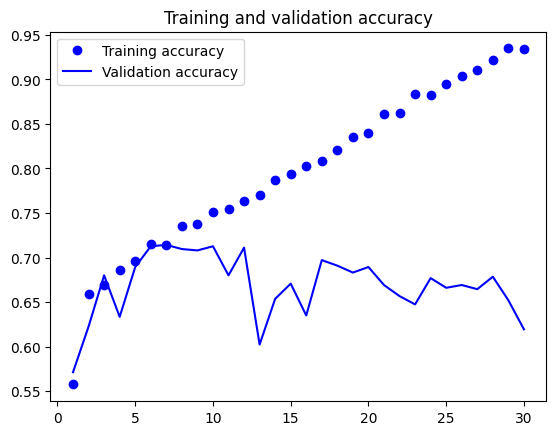

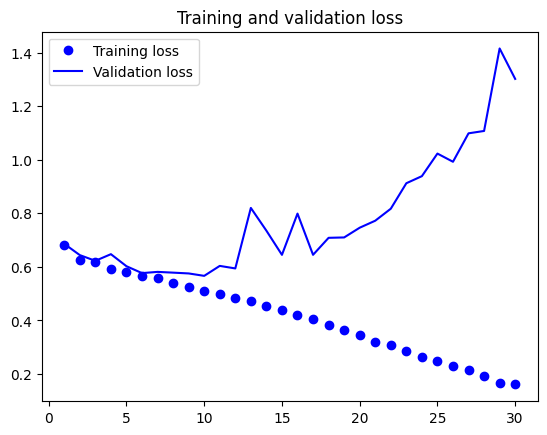

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_true = []
Y_pred = []

# Loop through the batches in the original 3-channel dataset
for images, labels in train_dataset:
    predictions = model.predict(images)
    Y_true.extend(labels.numpy())
    Y_pred.extend(np.round(predictions).flatten())  # round for binary labels

# Convert to arrays for metrics
Y_true = np.array(Y_true)
Y_pred = np.array(Y_pred)

# Compute metrics
accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred)
recall = recall_score(Y_true, Y_pred)
f1 = f1_score(Y_true, Y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

2025-04-23 03:36:45.746973: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[24,8,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,3,180,180]{3,2,1,0} %bitcast.274, f32[8,3,3,3]{3,2,1,0} %bitcast.281, f32[8]{0} %bitcast.283), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 03:36:45.795947: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted poten

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
Accuracy:  0.9193
Precision: 0.8696
Recall:    0.9867
F1 Score:  0.9244


2025-04-23 03:36:46.064911: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
import tensorflow as tf
# Accumulate batches
x_list = []
y_list = []

for images, labels in train_dataset:
    x_list.append(images.numpy())
    y_list.append(labels.numpy())

# Stack everything into NumPy arrays
xtrain = np.vstack(x_list)
ytrain_original = np.concatenate(y_list)

N = len(xtrain[:, 0, 0, 0])
L = len(xtrain[0, :, 0, 0])
xtrain_with_outputlabels = np.zeros((N, L, L, 4))  # 3 + 1 channels

for i in range(len(xtrain)):
    existing = xtrain[i, :, :, :]
    newchannel = np.full((L, L), ytrain_original[i]).reshape(L, L, 1)
    x = np.concatenate((existing, newchannel), axis = -1)
    xtrain_with_outputlabels[i] = x

train_dataset = tf.data.Dataset.from_tensor_slices((xtrain_with_outputlabels, ytrain_original))

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)

2025-04-23 03:28:09.401606: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-23 03:28:14.437652: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3110400000 exceeds 10% of free system memory.
2025-04-23 03:28:15.741242: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3110400000 exceeds 10% of free system memory.


In [6]:
# 1. Extract from validation_dataset
xval_list = []
yval_list = []

for images, labels in validation_dataset:
    xval_list.append(images.numpy())
    yval_list.append(labels.numpy())

xval = np.vstack(xval_list)
yval_original = np.concatenate(yval_list)

# 2. Add label as channel
N = len(xval[:, 0, 0, 0])
L = len(xval[0, :, 0, 0])
xval_with_outputlabels = np.zeros((N, L, L, 4))  # 3 + 1 channels

for i in range(N):
    existing = xval[i]
    newchannel = np.full((L, L), yval_original[i]).reshape(L, L, 1)
    xval_with_outputlabels[i] = np.concatenate((existing, newchannel), axis=-1)

# 3. Wrap into a dataset
val_dataset = tf.data.Dataset.from_tensor_slices((xval_with_outputlabels, yval_original))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


2025-04-23 03:28:17.641719: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
inputs = keras.Input(shape=(180, 180, 4))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=2, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs=outputs)

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 2)    │            74 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 4)      │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 4)        │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           197 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 791 (3.09 KB)

 Trainable params: 791 (3.09 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='hotdog_convnet.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [10]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks)

Epoch 1/30


2025-04-23 03:28:29.222088: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3110400000 exceeds 10% of free system memory.
I0000 00:00:1745396914.809126   40665 service.cc:152] XLA service 0x7098c8004c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745396914.809565   40665 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-04-23 03:28:34.887447: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745396915.144844   40665 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-04-23 03:28:35.507487: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[32,2,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,4,180,180]{3,2,1,0}

13/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5050 - loss: 0.6919

I0000 00:00:1745396917.013253   40665 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5186 - loss: 0.6889

2025-04-23 03:28:38.510967: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[24,2,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,4,180,180]{3,2,1,0} %bitcast.2722, f32[2,4,3,3]{3,2,1,0} %bitcast.2520, f32[2]{0} %bitcast.3151), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 03:28:38.564637: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted po

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5193 - loss: 0.6887

2025-04-23 03:28:39.943510: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.15 = (f32[32,2,178,178]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,4,180,180]{3,2,1,0} %bitcast.462, f32[2,4,3,3]{3,2,1,0} %bitcast.469, f32[2]{0} %bitcast.471), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/david/anaconda3/envs/hotdog-tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-23 03:28:40.006807: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted poten

94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.5197 - loss: 0.6886 - val_accuracy: 0.6429 - val_loss: 0.6504
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6413 - loss: 0.6327 - val_accuracy: 0.6941 - val_loss: 0.5933
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6835 - loss: 0.5908 - val_accuracy: 0.6366 - val_loss: 0.6211
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7001 - loss: 0.5749 - val_accuracy: 0.6925 - val_loss: 0.5640
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7251 - loss: 0.5407 - val_accuracy: 0.7640 - val_loss: 0.4991
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7305 - loss: 0.5339 - val_accuracy: 0.8028 - val_loss: 0.4442
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7630 - loss: 0.4870 - val_accuracy: 0.7609 - val_loss: 0.4951
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8121 - loss: 0.4243 - val_accuracy: 0.8820 - val_loss: 0